# Countries of the World

By Krzysztof Satola from: [github.com/ksatola](https://github.com/ksatola).

Based on CRISP-DM (Cross Industry Process for Data Mining).

## Business Understanding

### Dataset Dictionary

- **country** - country name
- **region** - region name
- **population** - number of people within country
- **area** - area in sq. mi.
- **popdensity** - population density per sq. mi.
- **coast** - coastline (coast/area ratio)
- **netmigr** - net migration. The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year. When the number of immigrants is larger than the number of emigrants, a positive net migration rate occurs. A positive net migration rates indicates that there are more people entering than leaving an area. When more emigrate from a country, the result is a negative net migration rate, meaning that more people are leaving than entering the area. When there is an equal number of immigrants and emigrants, the net migration rate is balanced ([source](https://en.wikipedia.org/wiki/Net_migration_rate)).
- **infmortality** - infant mortality (per 1000 births)
- **gdp** - gross domestic product (GDP) in $ per capita. The value of all final goods and services produced within a nation in a given year (2013), converted at market exchange rates to current U.S. dollars, divided by the average population for the same year ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita)).
- **literacy** - literacy level in %
- **phones** - phones per 1000
- **arable** - percent of arable areas
- **crops** - percent of cropland used to grow food
- **other** - other (%) ~????????????????~
- **climate** - climate type
- **birthrate** - the birth rate (technically, births/population rate), the total number of live births per 1,000 in a population in 2013 ([source](https://en.wikipedia.org/wiki/Birth_rate)).
- **deathrate** - number of deaths in units of deaths per 1,000 individuals ([source](https://en.wikipedia.org/wiki/Mortality_rate)).
- **agriculture** - percentage of GDP sector composition ratio for agriculture economy sector ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_sector_composition)). Agriculture % + Industry % + Service = 100% of GDP 
- **industry** - percentage of GDP sector composition ratio for industry economy sector
- **service** - percentage of GDP sector composition ratio for service economy sector

### Objectives

In this project, I explore [Countries of the Worlds Kaggle dataset](https://www.kaggle.com/fernandol/countries-of-the-world) to answer the following questions:

1. How different regions are compared to each other in terms of their area, population, population density and other attributes? What are distinguishing traits of wealthy and poor regions (GDP)?
2. What can we do to limit infant mortality?
3. What are the most significant predictors determining country's GDP per capita, the key indicator of economic development of any country?

Next, I write a post to ??? about my findings.

## Data Understanding

In [47]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Random state
rstate = 123

pd.options.display.float_format = '{:20.2f}'.format

In [4]:
%load_ext version_information

In [5]:
# Document versions of used libraries
%version_information numpy, pandas, matplotlib, seaborn

Software versions
Python 3.7.1 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.2.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.2
pandas 0.23.4
matplotlib 3.0.2
seaborn 0.9.0
Thu Mar 21 00:26:42 2019 CET

In [6]:
# Load data from a CSV file
df = pd.read_csv('./data/countries of the world.csv', decimal=',')

In [7]:
# Initial look into the dataset
df.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48.00,124.60,13.80,290.40,152.10
Coastline (coast/area ratio),0.00,1.26,0.04,58.29,0.00
Net migration,23.06,-4.93,-0.39,-20.71,6.60
Infant mortality (per 1000 births),163.07,21.52,31.00,9.27,4.05
GDP ($ per capita),700.00,4500.00,6000.00,8000.00,19000.00
Literacy (%),36.00,86.50,70.00,97.00,100.00


In [8]:
df.tail().T

,222,223,224,225,226
Country,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Region,NEAR EAST,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
Population,2460492,273008,21456188,11502010,12236805
Area (sq. mi.),5860,266000,527970,752614,390580
Pop. Density (per sq. mi.),419.90,1.00,40.60,15.30,31.30
Coastline (coast/area ratio),0.00,0.42,0.36,0.00,0.00
Net migration,2.98,NaN,0.00,0.00,0.00
Infant mortality (per 1000 births),19.62,NaN,61.50,88.29,67.69
GDP ($ per capita),800.00,NaN,800.00,800.00,1900.00
Literacy (%),NaN,NaN,50.20,80.60,90.70


In [9]:
df.sample(5, random_state=rstate).T

,125,122,156,150,79
Country,Malawi,Macau,Pakistan,Nicaragua,Greece
Region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE
Population,13013926,453125,165803560,5570129,10688058
Area (sq. mi.),118480,28,803940,129494,131940
Pop. Density (per sq. mi.),109.80,16183.00,206.20,43.00,81.00
Coastline (coast/area ratio),0.00,146.43,0.13,0.70,10.37
Net migration,0.00,4.86,-2.77,-1.22,2.35
Infant mortality (per 1000 births),103.32,4.39,72.44,29.11,5.53
GDP ($ per capita),600.00,19400.00,2100.00,2300.00,20000.00
Literacy (%),62.70,94.50,45.70,67.50,97.50


In [10]:
# Dataset size
df.shape

(227, 20)

## Data Preparation

In [11]:
# Variables
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [12]:
# Naming convention, simplify column names and build a dataset dictionary (see above)
df.rename(columns={"Country":"country", 
                  "Region":"region", 
                  "Population":"population", 
                  "Area (sq. mi.)":"area", 
                  "Pop. Density (per sq. mi.)":"popdensity", 
                  "Coastline (coast/area ratio)":"coast", 
                  "Net migration":"netmigr", 
                  "Infant mortality (per 1000 births)":"infmortality", 
                  "GDP ($ per capita)":"gdp", 
                  "Literacy (%)":"literacy", 
                  "Phones (per 1000)":"phones", 
                  "Arable (%)":"arable", 
                  "Crops (%)":"crops", 
                  "Other (%)":"other", 
                  "Climate":"climate", 
                  "Birthrate":"birthrate", 
                  "Deathrate":"deathrate", 
                  "Agriculture":"agriculture", 
                  "Industry":"industry", 
                  "Service":"service"}, inplace=True)

In [13]:
df.columns

Index(['country', 'region', 'population', 'area', 'popdensity', 'coast',
       'netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [14]:
# Examplary country data
df.iloc[163]

country                                     Poland 
region          EASTERN EUROPE                     
population                                 38536869
area                                         312685
popdensity                                   123.30
coast                                          0.16
netmigr                                       -0.49
infmortality                                   8.51
gdp                                        11100.00
literacy                                      99.80
phones                                       306.30
arable                                        45.91
crops                                          1.12
other                                         52.97
climate                                        3.00
birthrate                                      9.85
deathrate                                      9.89
agriculture                                    0.05
industry                                       0.31
service     

In [15]:
# Is there duplicated data in the dataset?
df.duplicated().mean()

0.0

In [16]:
# Country name can be treated as an unique identifier (no duplicated rows)
df.country.value_counts().mean()

1.0

In [17]:
# What are the dataset column data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country         227 non-null object
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
other           225 non-null float64
climate         205 non-null float64
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [18]:
# Make the strings categorical
df.country = df.country.astype('category')
df.region = df.region.astype('category')
df.climate = df.climate.astype('category')

# Remove blank spaces
df.region = df.region.str.strip()

In [19]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country         227 non-null category
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
other           225 non-null float64
climate         205 non-null category
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: category(2), float64(15), int64(2), object(1)
memory usage: 44.6+ KB


In [20]:
df.climate.value_counts()

2.00    111
3.00     48
1.00     29
1.50      8
4.00      6
2.50      3
Name: climate, dtype: int64

In [21]:
# What regions do we have?
count_countries_per_region = df.region.value_counts()
count_countries_per_region

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
WESTERN EUROPE          28
ASIA (EX. NEAR EAST)    28
OCEANIA                 21
NEAR EAST               16
EASTERN EUROPE          12
C.W. OF IND. STATES     12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: region, dtype: int64

Text(0, 0.5, 'Region')

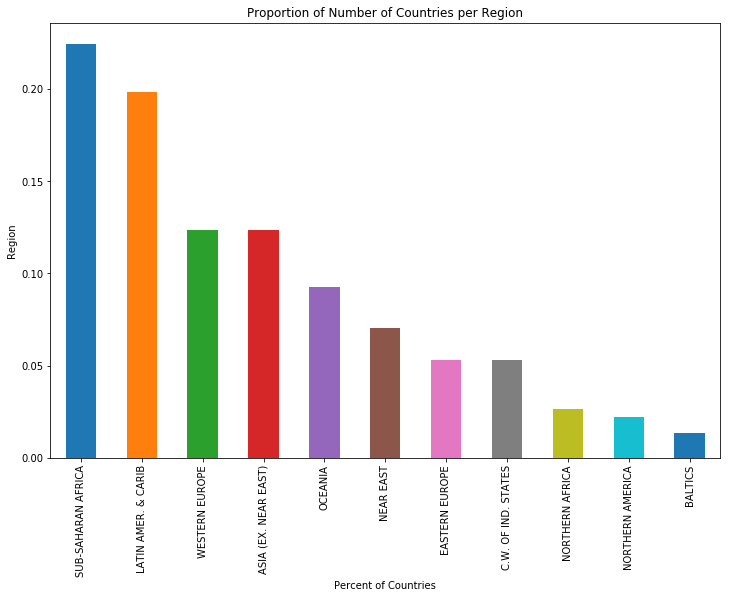

In [22]:
(count_countries_per_region/df.shape[0]).plot(kind="bar", figsize=(12,8));
plt.title('Proportion of Number of Countries per Region')
plt.xlabel('Percent of Countries')
plt.ylabel('Region')

Text(0, 0.5, 'GDP in $ per capita')

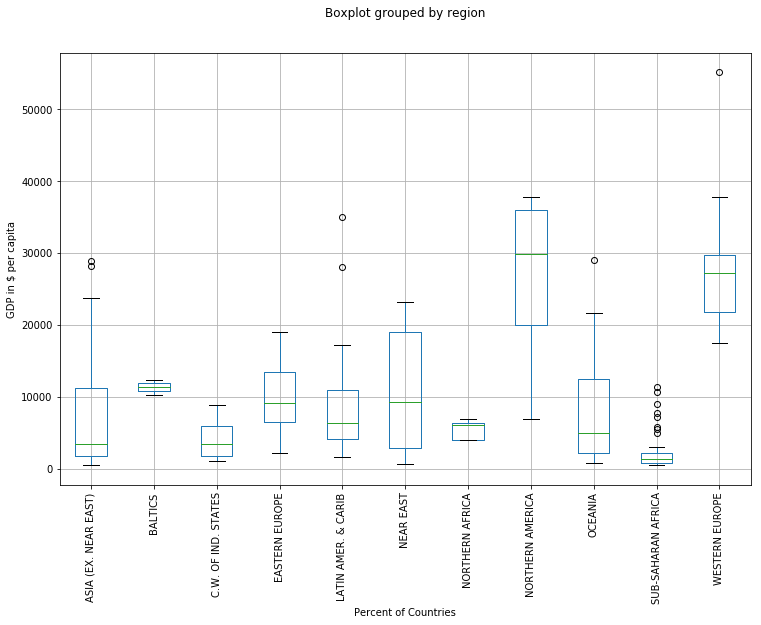

In [23]:
# GDPs per region
df.boxplot(column='gdp', by='region', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Percent of Countries')
plt.ylabel('GDP in $ per capita')

Combine regions close to each other geographically and in terms of their GDP
- Eastern Europe: EASTERN EUROPE + BALTICS
- Western Europe
- Africa: SUB-SAHARAN AFRICA + NORTHERN AFRICA
- Latin America and the Caribbean
- Northern America
- Asia: ASIA (EX. NEAR EAST) + C.W. OF IND. STATES + OCEANIA

In [24]:
# Remap new region definition to a new region2 column
mask = df.region == 'EASTERN EUROPE'
df.loc[mask, 'region2'] = 'Eastern Europe'
mask = df.region == 'BALTICS'
df.loc[mask, 'region2'] = 'Eastern Europe'

mask = df.region == 'WESTERN EUROPE'
df.loc[mask, 'region2'] = 'Western Europe'

mask = df.region == 'SUB-SAHARAN AFRICA'
df.loc[mask, 'region2'] = 'Africa'
mask = df.region == 'NORTHERN AFRICA'
df.loc[mask, 'region2'] = 'Africa'

mask = df.region == 'LATIN AMER. & CARIB'
df.loc[mask, 'region2'] = 'Latin America and the Caribbean'

mask = df.region == 'NORTHERN AMERICA'
df.loc[mask, 'region2'] = 'Northern America'

mask = df.region == 'ASIA (EX. NEAR EAST)'
df.loc[mask, 'region2'] = 'Asia'
mask = df.region == 'C.W. OF IND. STATES'
df.loc[mask, 'region2'] = 'Asia'
mask = df.region == 'OCEANIA'
df.loc[mask, 'region2'] = 'Asia'

In [25]:
df.sample(10, random_state=rstate).T

,125,122,156,150,79,211,184,167,196,20
country,Malawi,Macau,Pakistan,Nicaragua,Greece,Ukraine,Singapore,Reunion,Switzerland,Belize
region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE,C.W. OF IND. STATES,ASIA (EX. NEAR EAST),SUB-SAHARAN AFRICA,WESTERN EUROPE,LATIN AMER. & CARIB
population,13013926,453125,165803560,5570129,10688058,46710816,4492150,787584,7523934,287730
area,118480,28,803940,129494,131940,603700,693,2517,41290,22966
popdensity,109.80,16183.00,206.20,43.00,81.00,77.40,6482.20,312.90,182.20,12.50
coast,0.00,146.43,0.13,0.70,10.37,0.46,27.85,8.22,0.00,1.68
netmigr,0.00,4.86,-2.77,-1.22,2.35,-0.39,11.53,0.00,4.05,0.00
infmortality,103.32,4.39,72.44,29.11,5.53,20.34,2.29,7.78,4.39,25.69
gdp,600.00,19400.00,2100.00,2300.00,20000.00,5400.00,23700.00,5800.00,32700.00,4900.00
literacy,62.70,94.50,45.70,67.50,97.50,99.70,92.50,88.90,99.00,94.10


Text(0, 0.5, 'GDP in $ per capita')

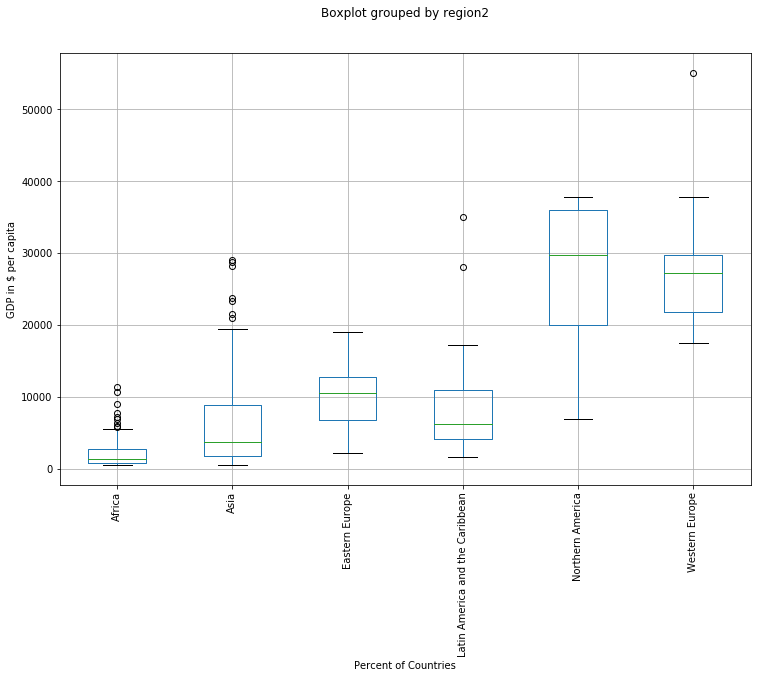

In [26]:
# GDPs per region2
df.boxplot(column='gdp', by='region2', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Percent of Countries')
plt.ylabel('GDP in $ per capita')

In [27]:
df.groupby(['region2']).agg({'country':'count', 'population':'sum', 'area':'sum'})

,country,population,area
region2,,,
Africa,57,910844133,30360296
Asia,61,4001195446,53717367
Eastern Europe,15,127099691,1327237
Latin America and the Caribbean,45,561824599,20544084
Northern America,5,331672307,21782471
Western Europe,28,396339998,3710478


In [28]:
# Find outlayers
gpd_per_country_weur = df[df.region2 == "Western Europe"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_weur.head(1)

,country,gdp
121,Luxembourg,55100.00


In [29]:
gpd_per_country_latin = df[df.region2 == "Latin America and the Caribbean"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_latin.head(2)

,country,gdp
38,Cayman Islands,35000.00
10,Aruba,28000.00


In [30]:
gpd_per_country_asia = df[df.region2 == "Asia"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_asia[gpd_per_country_asia.gdp > 20000]

,country,gdp
11,Australia,29000.00
91,Hong Kong,28800.00
103,Japan,28200.00
184,Singapore,23700.00
198,Taiwan,23400.00
149,New Zealand,21600.00
83,Guam,21000.00


In [31]:
gpd_per_country_africa = df[df.region2 == "Africa"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_africa[gpd_per_country_africa.gdp > 5000]

,country,gdp
133,Mauritius,11400.00
189,South Africa,10700.00
26,Botswana,9000.00
182,Seychelles,7800.00
143,Namibia,7200.00
205,Tunisia,6900.00
118,Libya,6400.00
2,Algeria,6000.00
167,Reunion,5800.00
72,Gabon,5500.00


For our analysis, we will select 6 distinct regions having similar GDP characteristics and compare different economical attributes between the regions.
write about outlayer countries 
dac mape z gdp dla wszystkich krajow

Text(0, 0.5, 'GDP in $ per Capita')

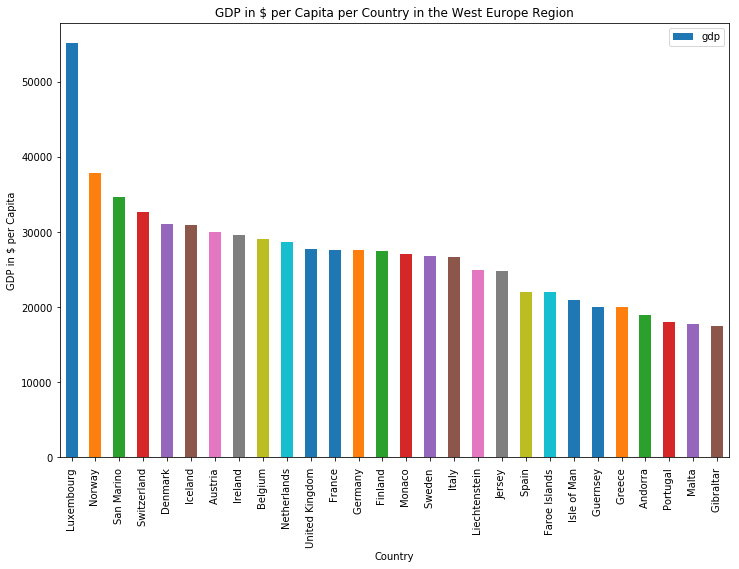

In [40]:
gpd_per_country_weur.plot(x='country', y='gdp', kind="bar", figsize=(12,8));
plt.title('GDP in $ per Capita per Country in the West Europe Region')
plt.xlabel('Country')
plt.ylabel('GDP in $ per Capita')

In [28]:
# Which regions are there, how many countries that fall into them, 
# what is their population and their total area?
#df.groupby(['region']).mean()[['population', 'area']]
df.groupby(['region']).agg({'country':'count', 'population':'sum', 'area':'sum'})

,country,population,area
region,,,
ASIA (EX. NEAR EAST),28,3687982236,23096712
BALTICS,3,7184974,175015
C.W. OF IND. STATES,12,280081548,22100843
EASTERN EUROPE,12,119914717,1152222
LATIN AMER. & CARIB,45,561824599,20544084
NEAR EAST,16,195068377,4355586
NORTHERN AFRICA,6,161407133,6018890
NORTHERN AMERICA,5,331672307,21782471
OCEANIA,21,33131662,8519812


In [29]:
# Show countries data by region

#df_by_region = df.set_index(['region', 'country']).sort_index()
#df_by_region.xs('ASIA (EX. NEAR EAST)')
#df_by_region.loc['OCEANIA', :] 

#df[df.region == 'ASIA (EX. NEAR EAST)']

df.query("region == 'ASIA (EX. NEAR EAST)' and gdp > 2500")

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,...,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service,region2
29,Brunei,ASIA (EX. NEAR EAST),379444,5770,65.80,2.79,3.59,12.61,18600.00,93.90,...,0.57,0.76,98.67,2.00,18.79,3.45,0.04,0.56,0.40,Asia
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.90,0.15,-0.40,24.18,5000.00,90.90,...,15.40,1.25,83.35,1.50,13.25,6.97,0.12,0.47,0.40,Asia
91,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.70,67.12,5.24,2.97,28800.00,93.50,...,5.05,1.01,93.94,2.00,7.29,6.29,0.00,0.09,0.91,Asia
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.20,0.21,-0.07,56.29,2900.00,59.50,...,54.40,2.74,42.86,2.50,22.01,8.18,0.19,0.28,0.54,Asia
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.90,2.85,0.00,35.60,3200.00,87.90,...,11.32,7.23,81.45,2.00,20.34,6.25,0.13,0.46,0.41,Asia
96,Iran,ASIA (EX. NEAR EAST),68688433,1648000,41.70,0.15,-0.84,41.58,7000.00,79.40,...,8.72,1.39,89.89,1.00,17.00,5.55,0.12,0.42,0.46,Asia
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.40,7.87,0.00,3.26,28200.00,99.00,...,12.19,0.96,86.85,3.00,9.37,9.16,0.02,0.26,0.72,Asia
110,"Korea, South",ASIA (EX. NEAR EAST),48846823,98480,496.00,2.45,0.00,7.05,17800.00,97.90,...,17.18,1.95,80.87,3.00,10.00,5.85,0.03,0.40,0.56,Asia
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.00,146.43,4.86,4.39,19400.00,94.50,...,0.00,0.00,100.00,2.00,8.48,4.47,0.00,0.07,0.93,Asia
126,Malaysia,ASIA (EX. NEAR EAST),24385858,329750,74.00,1.42,0.00,17.70,9000.00,88.70,...,5.48,17.61,76.91,2.00,22.86,5.05,0.08,0.48,0.44,Asia


In [ ]:
#g = df.groupby("region")
#g.median().T

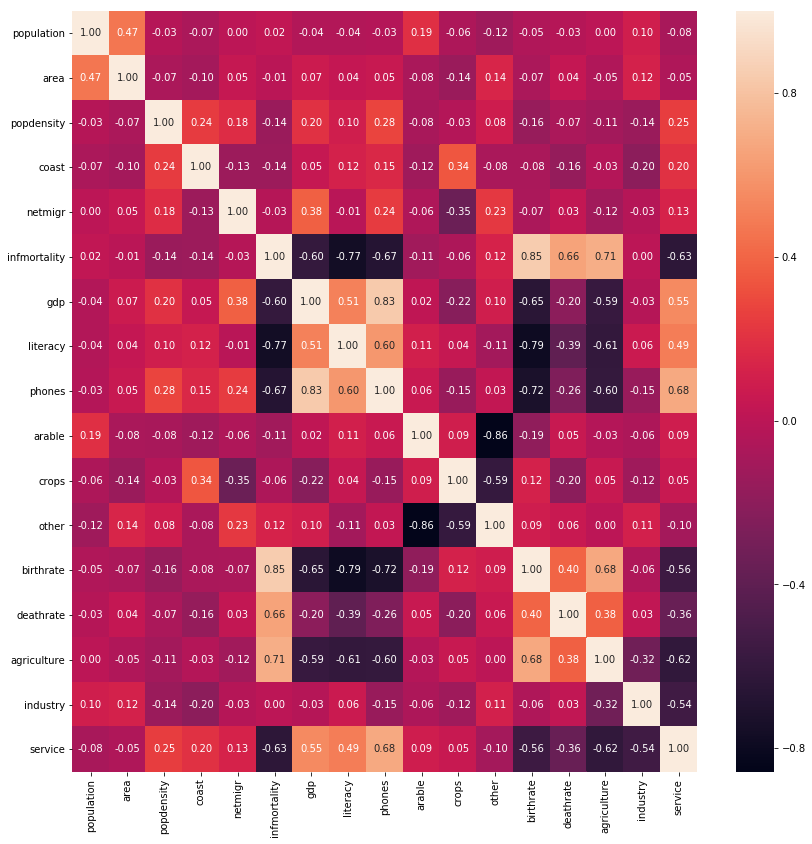

In [30]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show();

In [31]:
df.columns[:]

Index(['country', 'region', 'population', 'area', 'popdensity', 'coast',
       'netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service', 'region2'],
      dtype='object')

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,227.00,28740284.37,117891326.54,7026.00,437624.00,4786994.00,17497772.50,1313973713.00
area,227.00,598226.96,1790282.24,2.00,4647.50,86600.00,441811.00,17075200.00
popdensity,227.00,379.05,1660.19,0.00,29.15,78.80,190.15,16271.50
coast,227.00,21.17,72.29,0.00,0.10,0.73,10.34,870.66
netmigr,224.00,0.04,4.89,-20.99,-0.93,0.00,1.00,23.06
infmortality,224.00,35.51,35.39,2.29,8.15,21.00,55.70,191.19
gdp,226.00,9689.82,10049.14,500.00,1900.00,5550.00,15700.00,55100.00
literacy,209.00,82.84,19.72,17.60,70.60,92.50,98.00,100.00
phones,223.00,236.06,227.99,0.20,37.80,176.20,389.65,1035.60
arable,225.00,13.80,13.04,0.00,3.22,10.42,20.00,62.11


In [33]:
# Missing values
df.isnull().sum()

country          0
region           0
population       0
area             0
popdensity       0
coast            0
netmigr          3
infmortality     3
gdp              1
literacy        18
phones           4
arable           2
crops            2
other            2
climate         22
birthrate        3
deathrate        4
agriculture     15
industry        16
service         15
region2         16
dtype: int64

In [34]:
# What are the columns with missing values?
df.columns[np.sum(df.isnull()) != 0]

Index(['netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service', 'region2'],
      dtype='object')

In [35]:
df[df.netmigr.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,...,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service,region2
47,Cook Islands,OCEANIA,21388,240,89.10,50.00,nan,nan,5000.00,95.00,...,17.39,13.04,69.57,2.00,21.00,nan,0.15,0.10,0.75,Asia
221,Wallis and Futuna,OCEANIA,16025,274,58.50,47.08,nan,nan,3700.00,50.00,...,5.00,25.00,70.00,2.00,nan,nan,nan,nan,nan,Asia
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.00,0.42,nan,nan,nan,nan,...,0.02,0.00,99.98,1.00,nan,nan,nan,nan,0.40,Africa


### Notes

1. The dataset has 20 variables and 227 observations (one per each country).
2. The dataset column names were standardized and their meaning described in the dataset dictionary.
3. There were no duplicated observations in the dataset.
3. The dataset column types were corrected. The quantitative values used colons insted of periods. This was corrected.
4. The dataset columns with missing values are

## Data Modeling??

## Evaluate the Result

In [ ]:
# answer the questions

### 1. Wealthy vs. Poor Regions
There is one simgle measure of prosperity used in today's economy: GDP (XXXX). Co to jest - z opisu danych

Looking at the world's GDP per capita, we can cluster two groups of regions: wealthier ones (Northern America, Western and Eastern Europe) and poorer ones (Latin America and the Caribbean, Asia, Africa). Going further, some interesting questions arise: What are the distinguishing traits of wealthy and poor regions? What should the poor regions focus on to become wealthier? Let's find out.

In [189]:
# Median regions' GDP
df_gdp = pd.DataFrame(df.groupby('region2').median()['gdp'].sort_values(ascending=False))
df_gdp.index.name = 'Region'
df_gdp.columns = ['GDP Per Capita in US Dollars']
df_gdp

,GDP Per Capita in US Dollars
Region,
Northern America,29800.00
Western Europe,27200.00
Eastern Europe,10600.00
Latin America and the Caribbean,6300.00
Asia,3700.00
Africa,1400.00


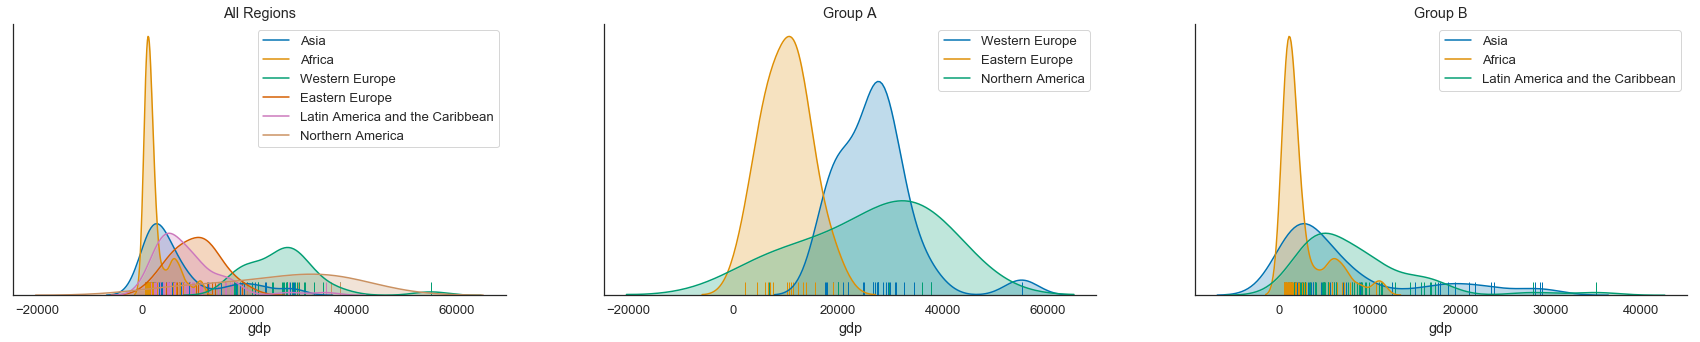

In [232]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.despine()

# World's GDP
g = sns.distplot(df[df['region2'] == 'Asia'].gdp, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].gdp, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].gdp, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].gdp, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].gdp, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].gdp, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

g.set(yticklabels=[])
g.set(title='All Regions')
g.legend(loc='upper right')

# Poor Regions' GDP
g = sns.distplot(df[df['region2'] == 'Western Europe'].gdp, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].gdp, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].gdp, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

g.set(yticklabels=[])
g.set(title='Group A')

# Wealthy Regions' GDP
g = sns.distplot(df[df['region2'] == 'Asia'].gdp, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].gdp, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].gdp, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

g.set(yticklabels=[])
g.set(title='Group B')

plt.savefig("./pics/gdp.png", dpi=600);
plt.show();

Within the wealthier regions (let' call them Group A), Eastern European countries are the poorest with quite low variability. Western European countries are similar but wealthier in general. There is one country with GDP above all, Luxemburg. Northern America countries have bigger spread with the United States at the top and St. Pierre & Miquelon at the bottom.

Poorer regions (let's call them Group B) tend to have right-skewed distributions of countries GDP with Africa having the lowest GDP of all, then Asia and the best of them Latin America. The Oceania region included in Asia (for simplicity) results in a long tail to the right with countries like Australia, Hong Kong, Japan or Singapure having GDP on the Western European level.

In [220]:
# Find outlayers
gpd_per_country_weur = df[df.region2 == "Western Europe"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_weur.head(5)

,country,gdp
121,Luxembourg,55100.00
154,Norway,37800.00
177,San Marino,34600.00
196,Switzerland,32700.00
54,Denmark,31100.00


In [223]:
gpd_per_country_namerica = df[df.region2 == "Northern America"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_namerica

,country,gdp
214,United States,37800.00
22,Bermuda,36000.00
36,Canada,29800.00
80,Greenland,20000.00
174,St Pierre & Miquelon,6900.00


In [225]:
gpd_per_country_asia = df[df.region2 == "Asia"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_asia[gpd_per_country_asia.gdp > 20000]

,country,gdp
11,Australia,29000.00
91,Hong Kong,28800.00
103,Japan,28200.00
184,Singapore,23700.00
198,Taiwan,23400.00
149,New Zealand,21600.00
83,Guam,21000.00


So what are the differences in world data regarding wealthier and poorer regions? Let's find out by comparing selected economic attributes. 

#### Literacy

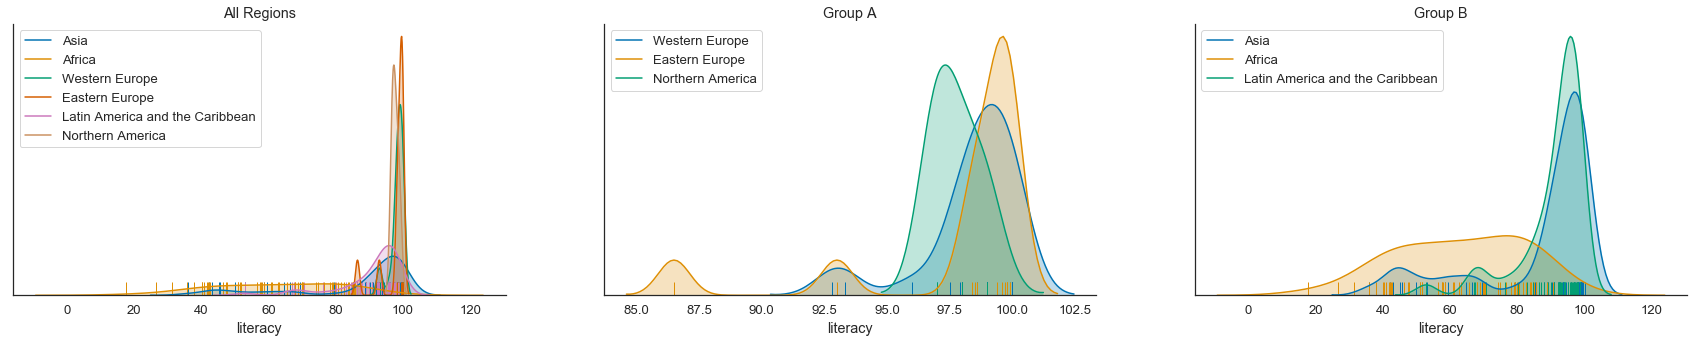

In [243]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.despine()

# World's literacy
g = sns.distplot(df[df['region2'] == 'Asia'].literacy, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].literacy, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].literacy, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].literacy, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].literacy, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].literacy, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

g.set(yticklabels=[])
g.set(title='All Regions')

# Poor Regions' literacy
g = sns.distplot(df[df['region2'] == 'Western Europe'].literacy, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].literacy, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].literacy, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

g.set(yticklabels=[])
g.set(title='Group A')

# Wealthy Regions' literacy
g = sns.distplot(df[df['region2'] == 'Asia'].literacy, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].literacy, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].literacy, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

g.set(yticklabels=[])
g.set(title='Group B')

plt.savefig("./pics/literacy.png", dpi=600);
plt.show();

In [239]:
df[df['region2'] == 'Eastern Europe'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(5)

,country,literacy
1,Albania,86.50
181,Serbia,93.00
168,Romania,98.40
50,Croatia,98.50
30,Bulgaria,98.60


In [240]:
df[df['region2'] == 'Africa'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(10)

,country,literacy
151,Niger,17.60
31,Burkina Faso,26.60
183,Sierra Leone,31.40
86,Guinea,35.90
188,Somalia,37.80
73,"Gambia, The",40.10
180,Senegal,40.20
21,Benin,40.90
132,Mauritania,41.70
5,Angola,42.00


In [241]:
df[df['region2'] == 'Asia'][['country', 'literacy']].sort_values(by=['literacy'], ascending=False).head(10)

,country,literacy
11,Australia,100.00
176,Samoa,99.70
211,Ukraine,99.70
18,Belarus,99.60
169,Russia,99.60
199,Tajikistan,99.40
216,Uzbekistan,99.30
137,Moldova,99.10
149,New Zealand,99.00
75,Georgia,99.00


Literacy seems to be one of the differentiators. Group A regions has literacy level above 85% of the population with the worst results by Albania (86.5%) and Serbia (93%) whereas Group B starts from 17.5% (Niger). Clearly, there is a strong set of countries in Group B with literacy level above XXX.

The Group B should focus on improving education level of their population leading to more innovative societes. More educated people will have easier access to knowledge, exchange and implement ideas with other nations leading to prosperity.

#### Agriculture
Agriculture world data indicator is percentage of GDP sector composition ratio for agriculture economy sector (source). Agriculture indicator, together with other two, Industry and Service, constitute 100% of GDP of a country.

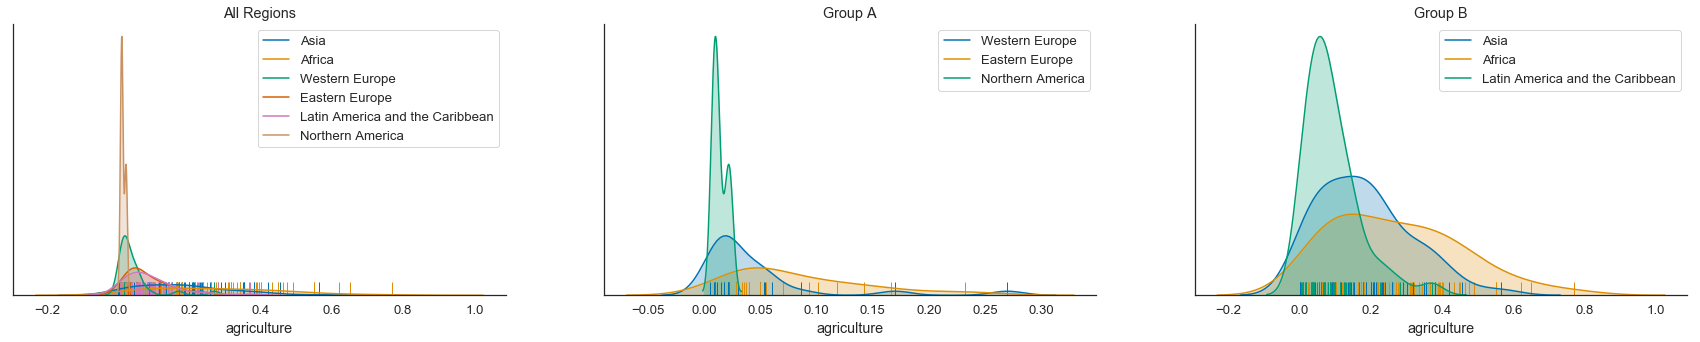

In [244]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.despine()

# World's agriculture
g = sns.distplot(df[df['region2'] == 'Asia'].agriculture, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].agriculture, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].agriculture, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].agriculture, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].agriculture, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].agriculture, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

g.set(yticklabels=[])
g.set(title='All Regions')

# Poor Regions' agriculture
g = sns.distplot(df[df['region2'] == 'Western Europe'].agriculture, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].agriculture, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].agriculture, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

g.set(yticklabels=[])
g.set(title='Group A')

# Wealthy Regions' agriculture
g = sns.distplot(df[df['region2'] == 'Asia'].agriculture, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].agriculture, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].agriculture, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

g.set(yticklabels=[])
g.set(title='Group B')

plt.savefig("./pics/agriculture.png", dpi=600);
plt.show();

Agriculture in more developed countries takes only a small portion of their GDP per capita. Looking at Eastern European countries in Group A and all countries in Group B we can notice thet the percentage of agriculture in GDP is more significant. It does not necessarily mean that more developed countries have worse agriculture indicators, it rather means that other sectors (Industry or Service) take precedence in influencing their GDP.

The Group B countries should focus on innovative industry and develop more their service sector to become more competitive.

#### Industry
The Industry indicator shows the percentage of GDP sector composition ratio for industry economy sector.

In [ ]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.despine()

# World's industry
g = sns.distplot(df[df['region2'] == 'Asia'].agriculture, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].agriculture, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].agriculture, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].agriculture, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].agriculture, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].agriculture, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

g.set(yticklabels=[])
g.set(title='All Regions')

# Poor Regions' industry
g = sns.distplot(df[df['region2'] == 'Western Europe'].agriculture, label='Western Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].agriculture, label='Eastern Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].agriculture, label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

g.set(yticklabels=[])
g.set(title='Group A')

# Wealthy Regions' industry
g = sns.distplot(df[df['region2'] == 'Asia'].agriculture, label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].agriculture, label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].agriculture, label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

g.set(yticklabels=[])
g.set(title='Group B')

plt.savefig("./pics/agriculture.png", dpi=600);
plt.show();

To summarize... powtorzyc najwazniejsze z question 1

In [157]:
# Find outlayers
area_per_country_weur = df[df.region2 == "Western Europe"][['country', 'area']].sort_values(by=['area'], ascending=False)
area_per_country_weur.head()

,country,area
69,France,547030
190,Spain,504782
195,Sweden,449964
76,Germany,357021
68,Finland,338145


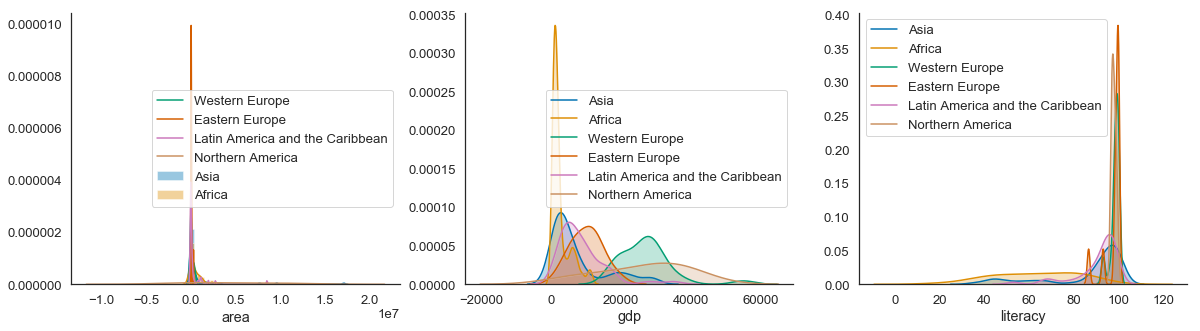

In [155]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.despine()

# Area
sns.distplot(df[df['region2'] == 'Asia'].area, label='Asia', axlabel='aa', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].area, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].area, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].area, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].area, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].area, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0])

# GDP
sns.distplot(df[df['region2'] == 'Asia'].gdp, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Africa'].gdp, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Western Europe'].gdp, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].gdp, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].gdp, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].gdp, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[1])

# Literacy
sns.distplot(df[df['region2'] == 'Asia'].literacy, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].literacy, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Western Europe'].literacy, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Eastern Europe'].literacy, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].literacy, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Northern America'].literacy, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[2])

plt.show();

In [ ]:
x = df.loc[:, ["region2", "gdp", "infmortality", "birthrate", "phones", "literacy", "service"]]
sns.pairplot(x, hue="region2", palette="inferno");

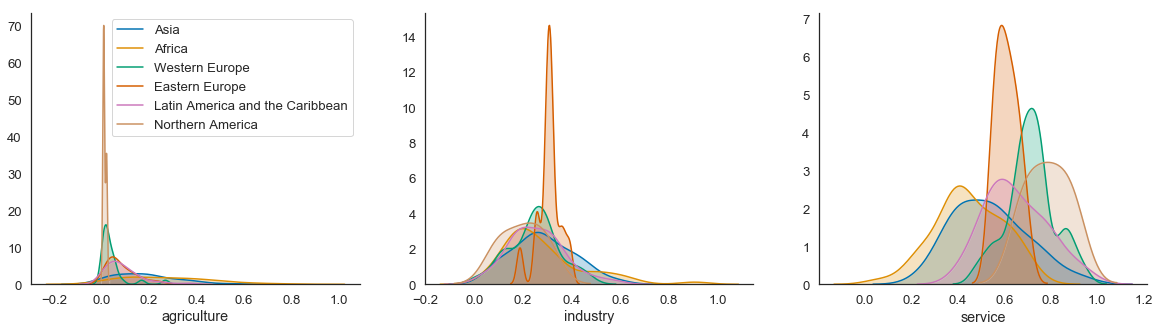

In [146]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.despine()

# Agriculture
sns.distplot(df[df['region2'] == 'Asia'].agriculture, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Africa'].agriculture, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Western Europe'].agriculture, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].agriculture, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].agriculture, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0])
sns.distplot(df[df['region2'] == 'Northern America'].agriculture, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0])

# Industry
sns.distplot(df[df['region2'] == 'Asia'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Africa'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Western Europe'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])
sns.distplot(df[df['region2'] == 'Northern America'].industry, hist=False, kde_kws={"shade":True}, ax=axes[1])

# Service
sns.distplot(df[df['region2'] == 'Asia'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Africa'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Western Europe'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Eastern Europe'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])
sns.distplot(df[df['region2'] == 'Northern America'].service, hist=False, kde_kws={"shade":True}, ax=axes[2])

#plt.legend( loc=2, borderaxespad=0.)

#
plt.show();

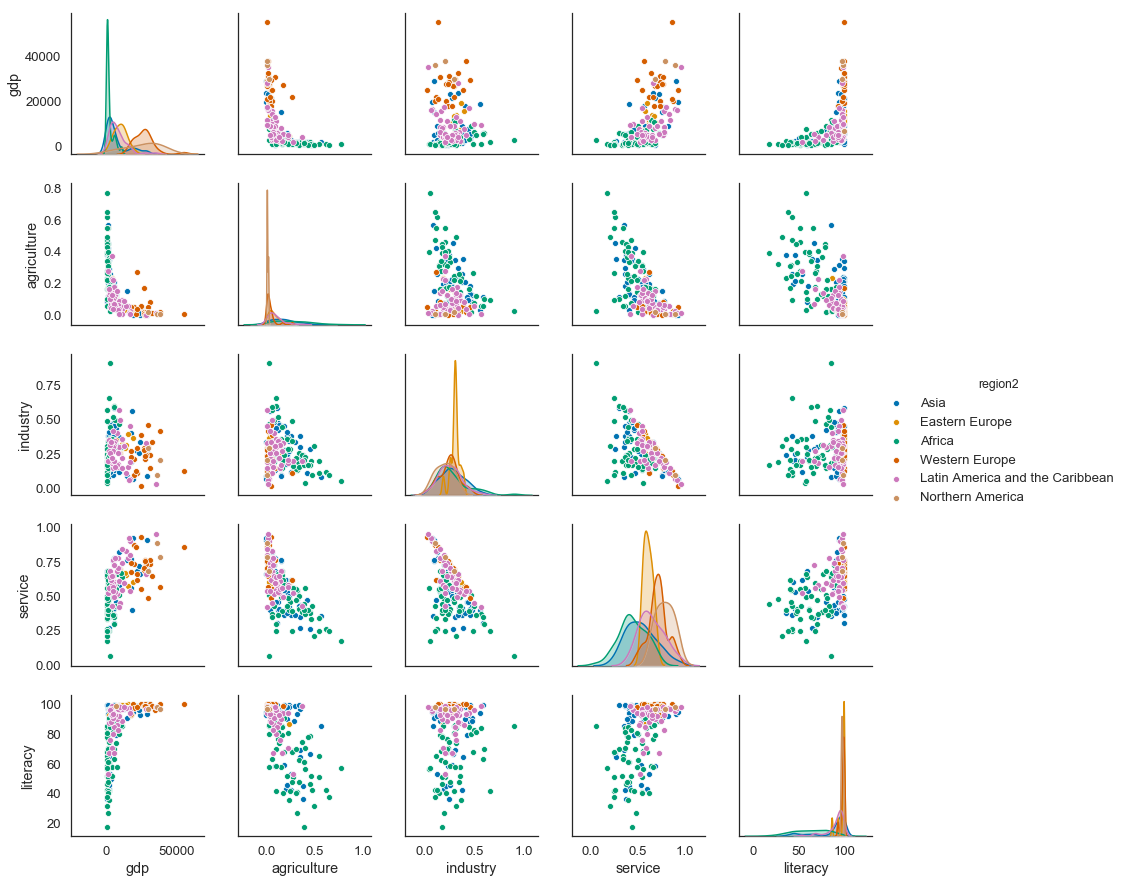

In [167]:
x = df.loc[:, ["region2", "gdp", "agriculture", "industry", "service", "literacy"]]
sns.pairplot(x, hue="region2", palette="colorblind");

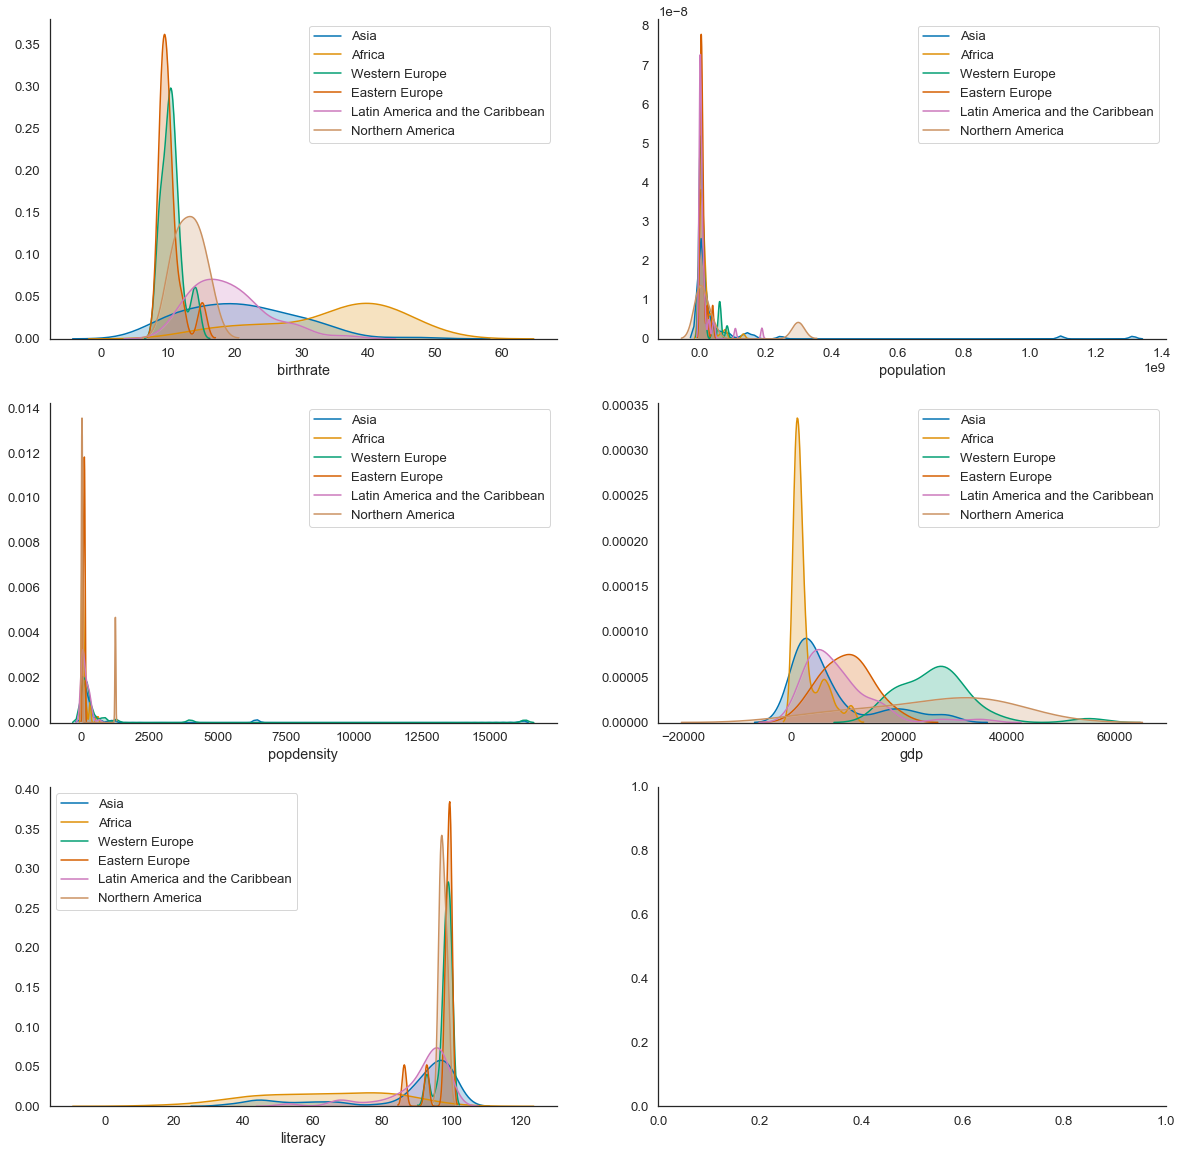

In [130]:
sns.set(style="white", font_scale=1.2, palette='colorblind')
f, axes = plt.subplots(3, 2, figsize=(20, 20))

sns.despine()

# Birthrate
sns.distplot(df[df['region2'] == 'Asia'].birthrate, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Africa'].birthrate, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Western Europe'].birthrate, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].birthrate, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].birthrate, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0,0])
sns.distplot(df[df['region2'] == 'Northern America'].birthrate, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0,0])

# Population
sns.distplot(df[df['region2'] == 'Asia'].population, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Africa'].population, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Western Europe'].population, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].population, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].population, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[0,1])
sns.distplot(df[df['region2'] == 'Northern America'].population, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[0,1])

# Population Density
sns.distplot(df[df['region2'] == 'Asia'].popdensity, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Africa'].popdensity, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Western Europe'].popdensity, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].popdensity, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].popdensity, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[1,0])
sns.distplot(df[df['region2'] == 'Northern America'].popdensity, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[1,0])

# GDP
sns.distplot(df[df['region2'] == 'Asia'].gdp, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Africa'].gdp, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Western Europe'].gdp, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Eastern Europe'].gdp, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].gdp, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[1,1])
sns.distplot(df[df['region2'] == 'Northern America'].gdp, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[1,1])

# Literacy
sns.distplot(df[df['region2'] == 'Asia'].literacy, label='Asia', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Africa'].literacy, label='Africa', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Western Europe'].literacy, label='Western Europe', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Eastern Europe'].literacy, label='Eastern Europe', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'].literacy, label='Latin America and the Caribbean', hist=False, kde_kws={"shade":True}, ax=axes[2,0])
sns.distplot(df[df['region2'] == 'Northern America'].literacy, label='Northern America', hist=False, kde_kws={"shade":True}, ax=axes[2,0])

plt.show();

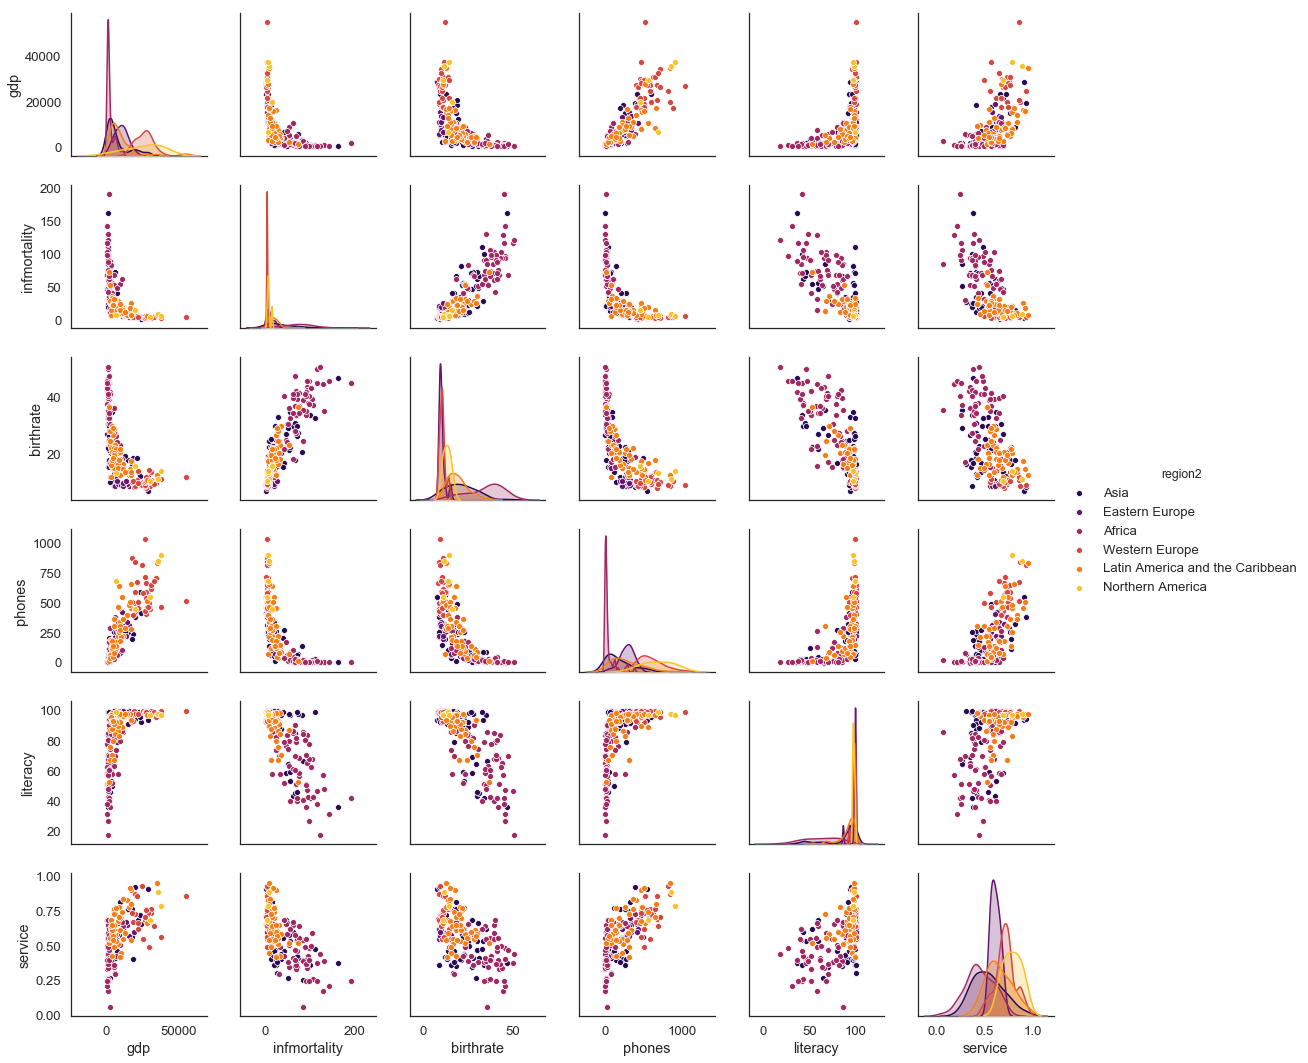

In [164]:
x = df.loc[:, ["region2", "gdp", "infmortality", "birthrate", "phones", "literacy", "service"]]
sns.pairplot(x, hue="region2", palette="inferno");

It is interesting how different regions on the same continent can be (Europe). The West European countries have generally better indicators than East European countires, which is due to longer period of prosperity, democratic or republic systems and consideration for the law.

### 2. What can we do to limit infant mortality?

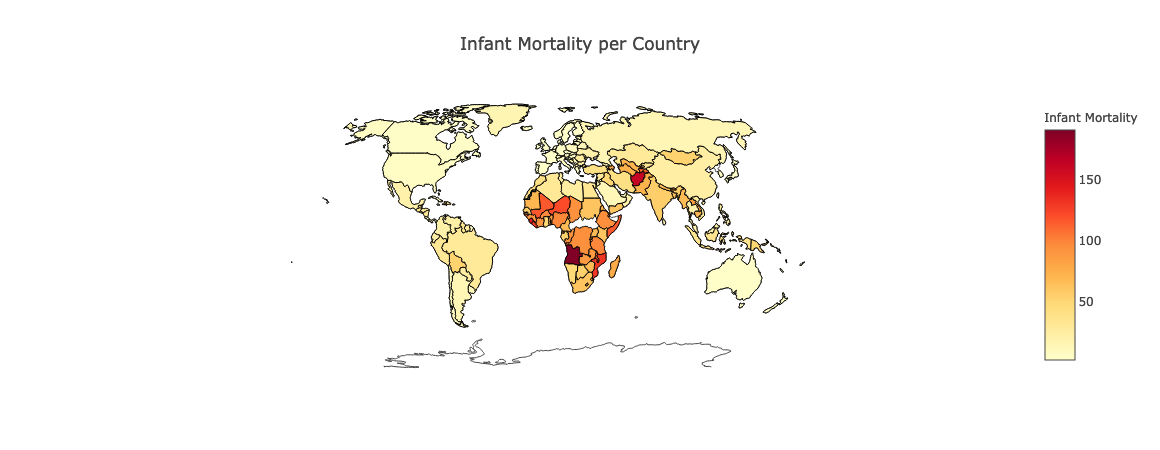

In [35]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.infmortality,
text = df.country, colorbar = {'title':'Infant Mortality'},
colorscale = 'YlOrRd', reversescale = True)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

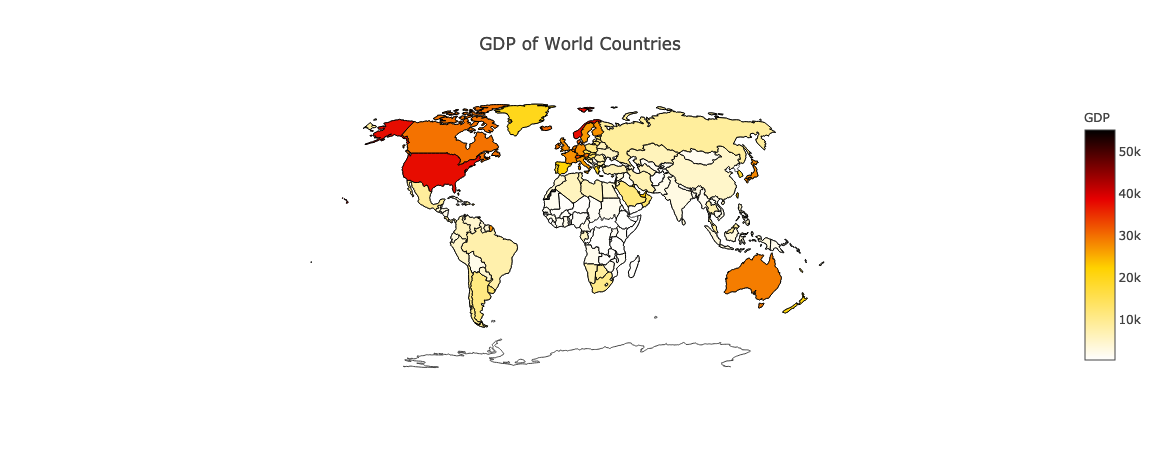

In [36]:
#Population per country
data = dict(type='choropleth',
locations = df.country,
locationmode = 'country names', z = df.gdp,
text = df.country, colorbar = {'title':'GDP'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [43]:
# How infant mortality is related to other features?
#df[df.columns[:]].corr()['infmortality'][:]
df.corr()['infmortality'].sort_values(ascending=False)

infmortality                   1.00
birthrate                      0.85
agriculture                    0.71
deathrate                      0.66
other                          0.12
population                     0.02
industry                       0.00
area                          -0.01
netmigr                       -0.03
crops                         -0.06
arable                        -0.11
coast                         -0.14
popdensity                    -0.14
gdp                           -0.60
service                       -0.63
phones                        -0.67
literacy                      -0.77
Name: infmortality, dtype: float64

In [ ]:
# What influences infant mortality most?
df.corr()['infmortality'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,8));
plt.title('Infant Mortality Influencers')
plt.xlabel('Influencers')
plt.ylabel('Pearson Correlation')

In [ ]:
# What influences infant mortality most?
df.corr()['infmortality'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,8));
plt.title('Infant Mortality Influencers')
plt.xlabel('Influencers')
plt.ylabel('Pearson Correlation')

Infant mortality is the death of young children under the age of 1. This death toll is measured by the infant mortality rate (IMR), which is the number of deaths of children under one year of age per 1000 live births. In the 21st century, in the age of robotics, genetics and sophisticated healthcare the mortality rate should be greatly minimized. Yet there are still regions where XXX per 1000 dies during the first year after birth.

Looking at the world maps of mortality and gdp we see they are like inverse of each other. Countries with greater GDP have lower infant mortality and vice versa.

Looking at the world data we can clearly see that the more agricultural the country is, the greater chance of premature mortality exists. The more educated and wealthy the nation is, the more chance infants have to survive. In this context, it is important to that richer and developed countries help the poorer ones both economically and in terms of education. The more aware and enlightened people are, the bigger care they can put into proper health-care infrastructure and treatment (vaccination, healthy life style and medical examinations while pregnant, breastfeeding, etc.) the more chance to survive infants have. All of these may happen more frequently in richer and peaceful societies.

### 3.

## Deploy

In [ ]:
# post + model for prediction

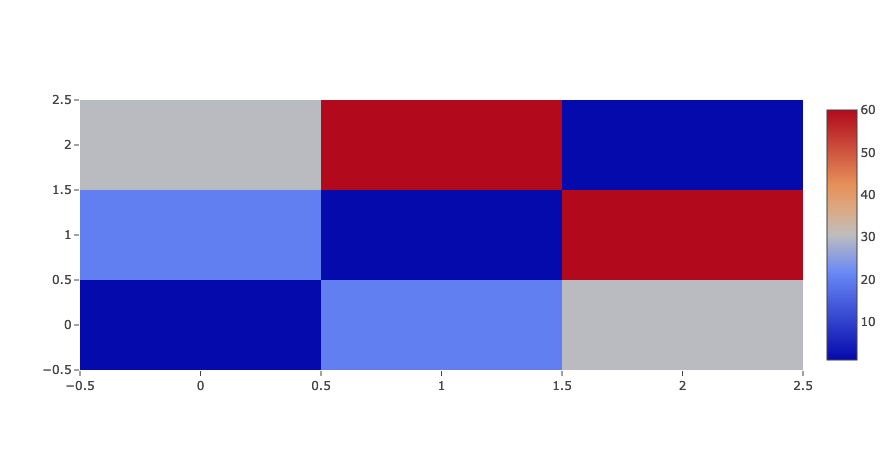

In [46]:
import plotly
from plotly.offline import iplot

trace = plotly.graph_objs.Heatmap(z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]])

fig = dict(data=[trace])

iplot(fig)